# Data Analysis - Astronomical Data

## Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset

In [2]:
star_df = pd.read_csv("https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-")

In [3]:
star_df.sample(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
108,24345,142000.00000,57.0000,-6.24,4,Blue,O
174,3600,240000.00000,1190.0000,-7.89,5,Red,M
164,8927,239000.00000,35.0000,-7.34,4,Blue,O
127,2861,0.00019,0.0899,16.71,0,Red,M
13,3628,0.00550,0.3930,10.48,1,Red,M


In [4]:
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [5]:
folder_name = "star_plots"

os.makedirs(folder_name, exist_ok=True)

## Visualizations

* 0 -> Brown Dwarf

* 1 -> Red Dwarf

* 2 -> White Dwarf

* 3 -> Main Sequence

* 4 -> Supergiants

* 5 -> Hypergiants

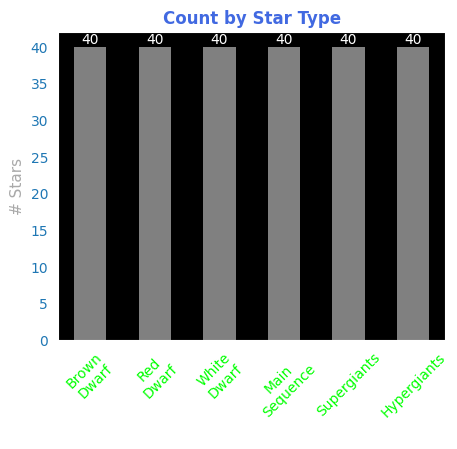

In [6]:
plt.figure(figsize=(5, 4))
plt.style.use('dark_background')
ax = star_df['Star type'].value_counts().plot(kind='bar', color='grey')
ax.bar_label(ax.containers[0], color='white')
plt.title("Count by Star Type", color='royalblue', weight='bold')
plt.yticks(color='tab:blue')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5],
           labels = "Brown\nDwarf, Red\nDwarf, White\nDwarf, Main\nSequence, Supergiants, Hypergiants".split(", "),
           rotation=45, color='lime')
plt.ylabel('# Stars', color='darkgrey', fontsize=11)
plt.savefig("/content/star_plots/barplot_star_count.png")
plt.show()

<ipython-input-7-34d27e521353>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = star_df['Star color'].value_counts().index,


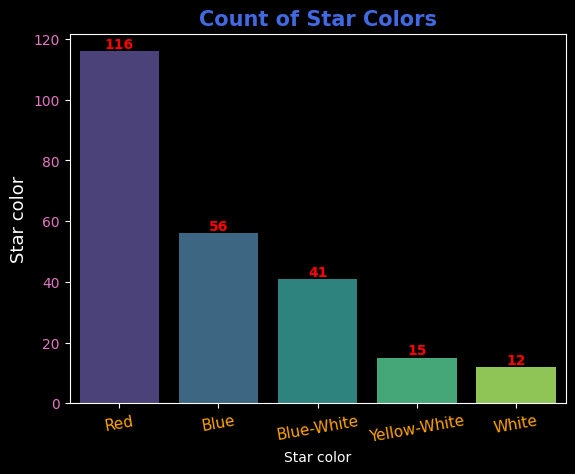

In [7]:
ax = sns.barplot(x = star_df['Star color'].value_counts().index,
                 y = star_df['Star color'].value_counts(),
                 palette = 'viridis')

for container in ax.containers:
    ax.bar_label(container, color='red', weight='bold')
plt.title("Count of Star Colors", color='royalblue', fontsize=15, weight='bold')
plt.xticks(rotation=10, color='orange', fontsize=11)
plt.ylabel('Star color', color='white', fontsize=13)
plt.yticks(color='tab:pink')
plt.savefig("/content/star_plots/star_colors.png")
plt.show()

### Outliers

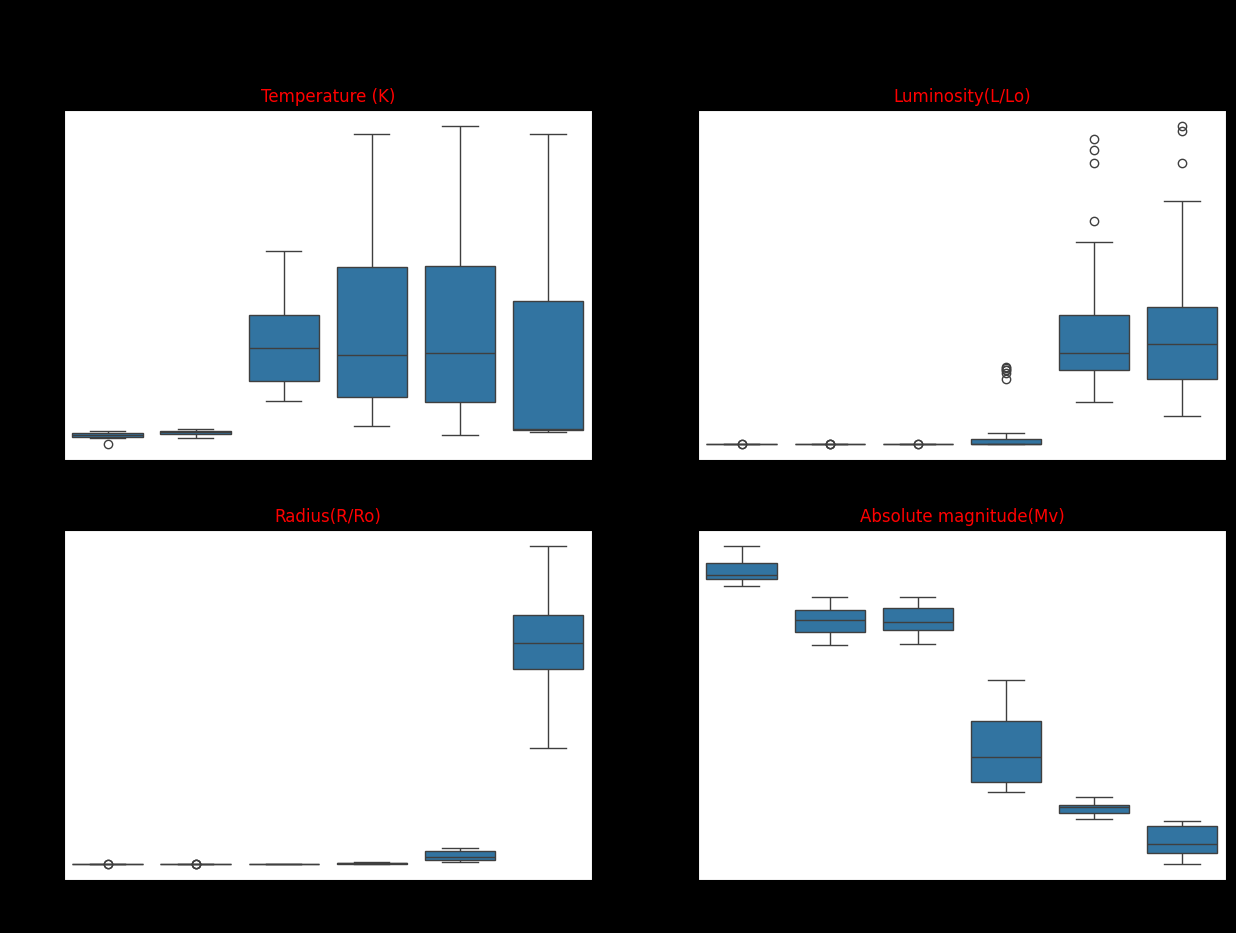

In [8]:
plt.figure(figsize=(15, 10))
plt.style.use('default')
plt.suptitle("Outliers in numeric features of Star data")
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = star_df['Star type'], y = star_df.iloc[:, i])
    plt.title(star_df.columns[i], color='red')
    plt.ylabel('')

plt.savefig("/content/star_plots/boxplot_star_type.png")
plt.show()

## Line plots

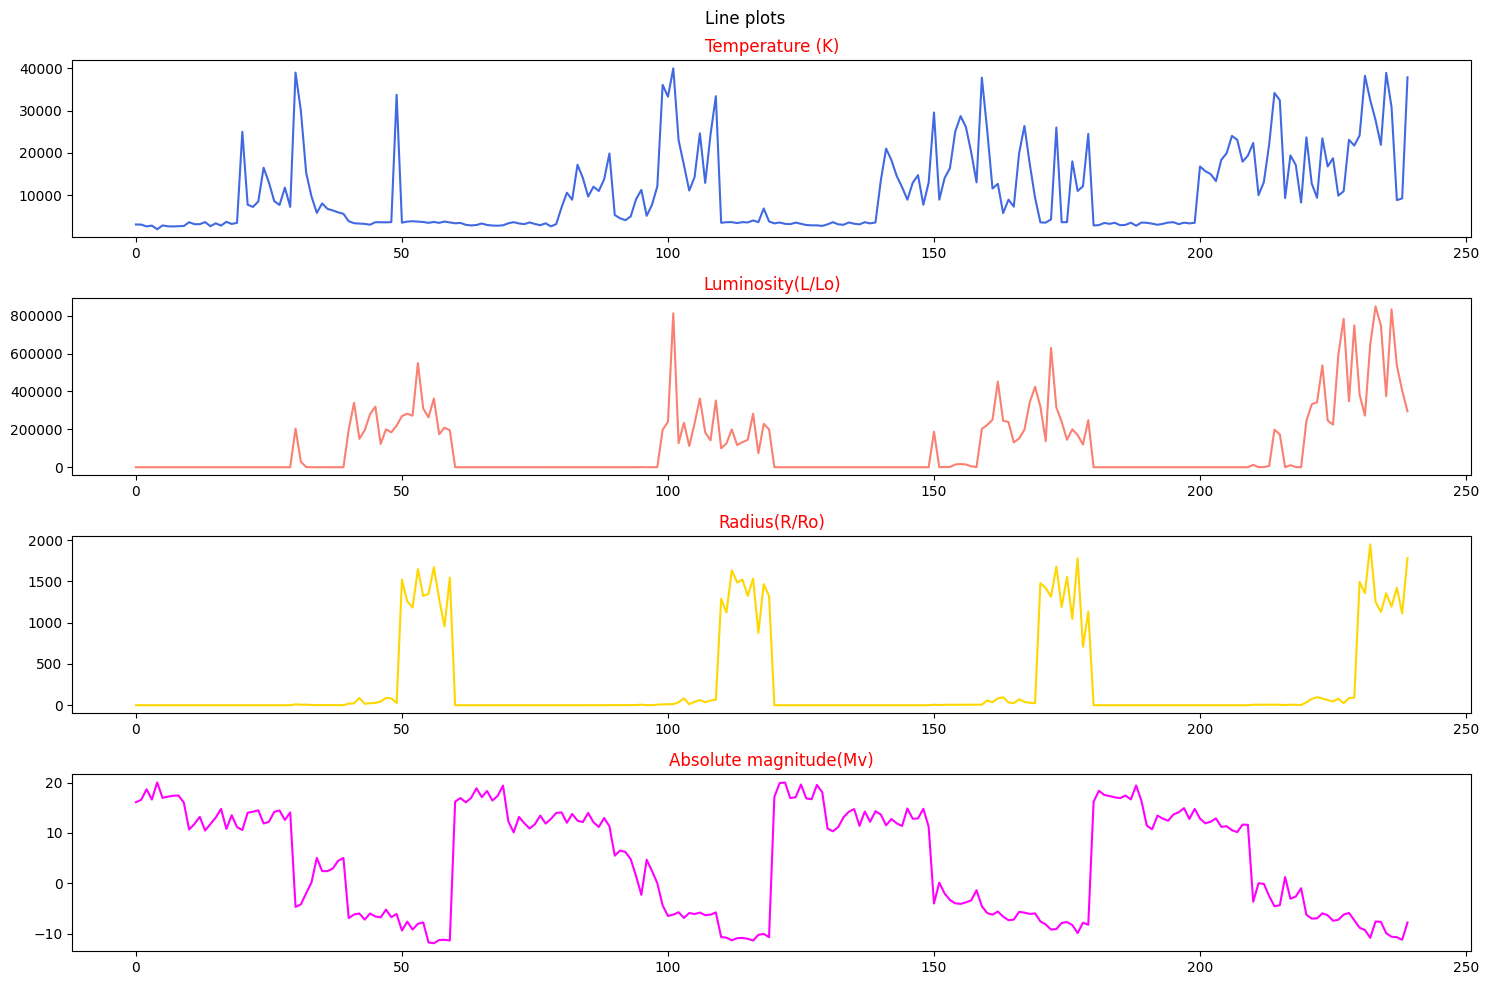

In [9]:
colors=['royalblue', 'salmon', 'gold', 'magenta']
plt.figure(figsize=(15, 10))
plt.suptitle("Line plots")
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.plot(star_df.iloc[:, i], color=colors[i])
    plt.title(star_df.columns[i], color='red')

plt.tight_layout()
plt.savefig("/content/star_plots/line_plots.png")
plt.show()

## Pair plots

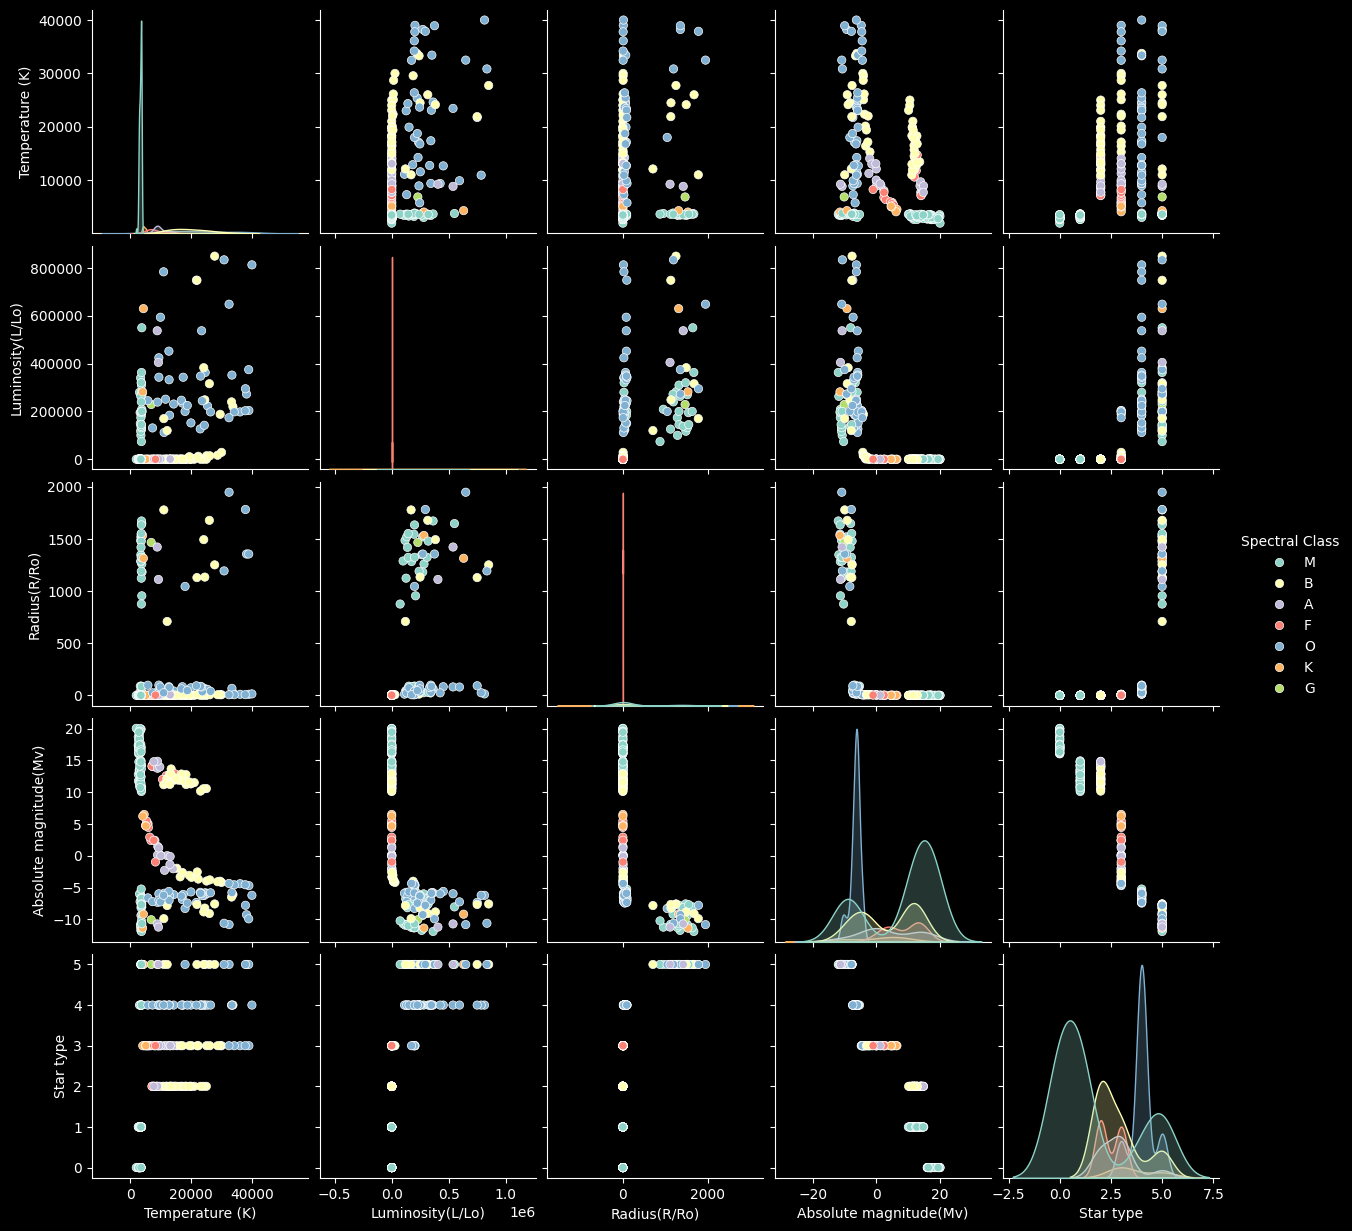

In [10]:
plt.style.use('dark_background')
sns.pairplot(star_df, hue='Spectral Class')
plt.show()

## HR Diagram

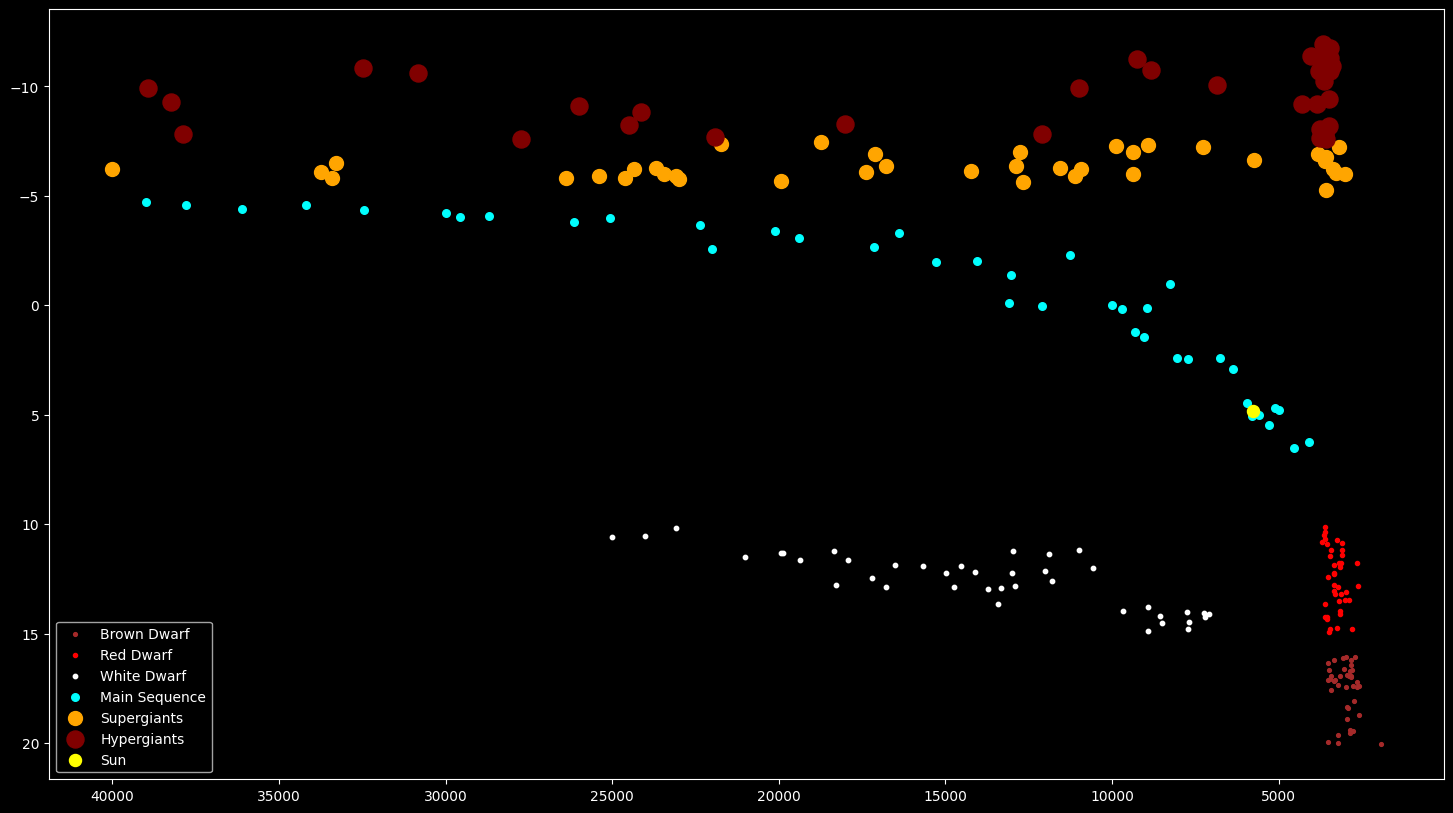

In [14]:
# Hertzsprung-Rusell Diagram
star_type = star_df['Star type'].values
temperature = star_df['Temperature (K)'].values
abs_mag = star_df['Absolute magnitude(Mv)'].values

star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'white', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'}
}

axes = []
labels = set()

plt.figure(figsize=(18, 10))

for i in range(len(star_type)):
    properties = star_types[star_type[i]]

    ax = plt.scatter(temperature[i],
                     abs_mag[i],
                     s=properties['size'],
                     c=properties['color'],
                     marker=properties['marker'],
                     label=properties['label']
         )
    if properties['label'] not in labels:
        axes.append(ax)
        labels.add(properties['label'])

ax_sun = plt.scatter(5778, 4.83, s=75, c="yellow", marker="o", label='Sun')
axes.append(ax_sun)
labels.add("Sun")


plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.legend(handles = axes)

plt.savefig("/content/star_plots/hr_diagram.png")

plt.show()